In [31]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [32]:
import re

def parse_oscilloscope_data(input_data):
    data = {
        'time_step': None,
        'voltage_step': None,
        'zero_level': None
    }
    
    patterns = {
        'time_step': r'Time step\s*=\s*([\d,]+)\s*([munpf]?)S',
        'voltage_step': r'Voltage step\s*=\s*([\d,]+)\s*([mun]?)V',
        'zero_level': r'Zero level\s*=\s*([\d,]+)'
    }
    
    unit_multipliers = {
        'n': 1e-9,
        'u': 1e-6,
        'm': 1e-3,
        'p': 1e-12,
        'f': 1e-15,
        '': 1
    }
        
    for line in input_data:
        line = line.strip()
        
        if match := re.search(patterns['time_step'], line, re.IGNORECASE):
            value = float(match.group(1).replace(',', '.'))
            unit = match.group(2).lower()
            data['time_step'] = value * unit_multipliers.get(unit, 1)
        
        elif match := re.search(patterns['voltage_step'], line, re.IGNORECASE):
            value = float(match.group(1).replace(',', '.'))
            unit = match.group(2).lower()
            data['voltage_step'] = value * unit_multipliers.get(unit, 1)
        
        elif match := re.search(patterns['zero_level'], line, re.IGNORECASE):
            value = float(match.group(1).replace(',', '.'))
            data['zero_level'] = value
    
    data["zero_level"] *= data['voltage_step']
    
    return data
        

In [33]:
DIRECTORY = "Lab4_data"

FFT_N = 8192

def plot_osc_spec(name, lines, N, FFT_N, CLIP_FFT_N, markers=[], crop_markers_left=0, crop_markers_right=-1):
    t = []
    x = []
    
    settings = parse_oscilloscope_data(lines[:5])        
    for line in lines:
        if len(line.split("\t")) < 3:
            continue
        try:
            t_i, x_i, _ = list(map(int, line.split("\t")))
        except:
            continue
        
        t.append(t_i * settings["time_step"])
        x.append(x_i)

    t = np.array(t)
    x = np.array(x)

    plt.figure(figsize=(12, 5))
    print(name)
    plt.xlabel("$t$, мкс")
    plt.ylabel("$U$, В")
    plt.plot(t[:N] * 1e6, x[:N])
    plt.show()
    
    X = np.abs(np.fft.fft(x, FFT_N))

    X_db = 20 * np.log10(X)

    if len(markers) > 0:
        plt.figure(figsize=(12, 5))
        print(f"FFT with markers, {name}")
        plt.xlabel("$f$, МГц")
        plt.ylabel("$X$, дБ")
        for marker in markers:
            i = int(marker / (2 * np.pi / settings["time_step"] / 1e12))
            
            print(crop_markers_left, crop_markers_right)
            
            # delta_i = 15
            delta_i = 15
            print(f"marker: {marker}, value: {np.min(X_db[i - delta_i : i + delta_i])} - {np.max(X_db[i - delta_i : i + delta_i])} дБ")
            plt.axvline(x=marker, color='red', linestyle='--', linewidth=2)
            # plt.axvline(x=(i - delta_i) * 2 * np.pi / settings["time_step"] / 1e12, color='green', linestyle='--', linewidth=2)
            # plt.axvline(x=(i + delta_i) * 2 * np.pi / settings["time_step"] / 1e12, color='green', linestyle='--', linewidth=2)
        crop_markers_left = int(crop_markers_left / (2 * np.pi / settings["time_step"] / 1e12))
        crop_markers_right = int(crop_markers_right / (2 * np.pi / settings["time_step"] / 1e12))
        plt.plot(np.arange(FFT_N)[crop_markers_left:crop_markers_right] * 2 * np.pi / settings["time_step"] / 1e12, X_db[crop_markers_left:crop_markers_right
                                                                                                                         ])
        plt.show()
    
    X = np.abs(np.fft.fft(x, FFT_N))

    plt.figure(figsize=(12, 5))
    print(f"FFT, {name}")
    plt.xlabel("$f$, МГц")
    plt.ylabel("$X$, дБ")
    plt.plot(np.arange(FFT_N)[:CLIP_FFT_N] * 2 * np.pi / settings["time_step"] / 1e12, X_db[:CLIP_FFT_N])
    plt.show()

for filename in os.listdir(DIRECTORY):
    if not filename.endswith('.txt'):
        continue
    filepath = os.path.join(DIRECTORY, filename)
    
    t = []
    x = []
    
    with open(filepath, "r") as f:
        lines = f.readlines()
        settings = parse_oscilloscope_data(lines[:5])        
        # plot_osc_spec(lines, 8000, 8192)

2_2


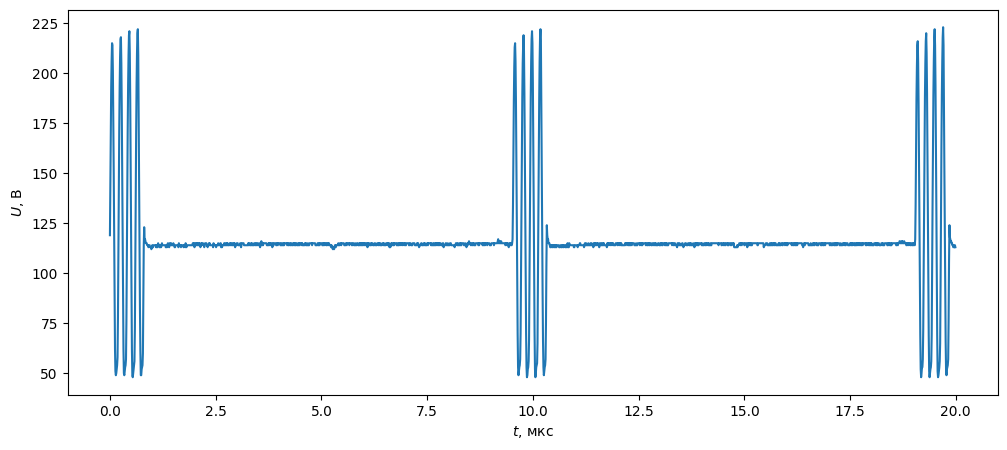

FFT with markers, 2_2
0 0.7
marker: 0.19, value: 45.681459534535335 - 70.48478990021044 дБ
0 0.7
marker: 0.25, value: 57.770472565362226 - 89.5302059853874 дБ
0 0.7
marker: 0.32, value: 36.997902957853036 - 68.16539775769445 дБ


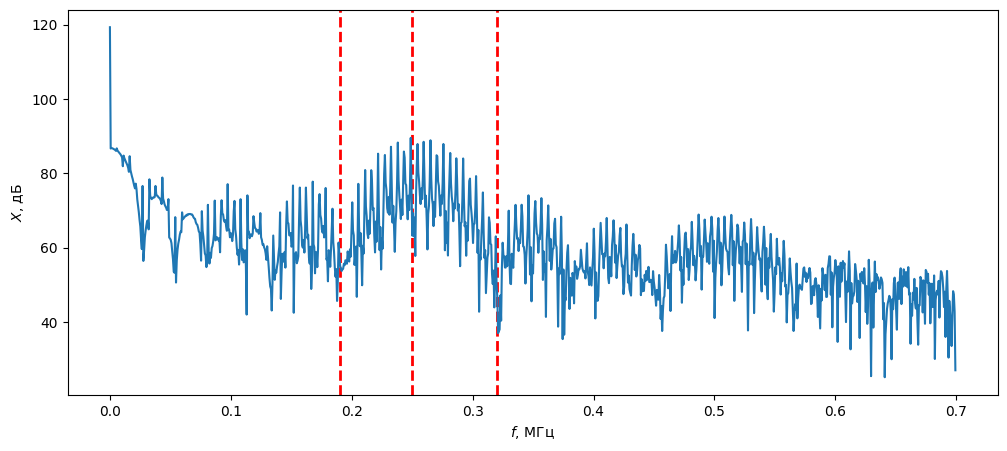

FFT, 2_2


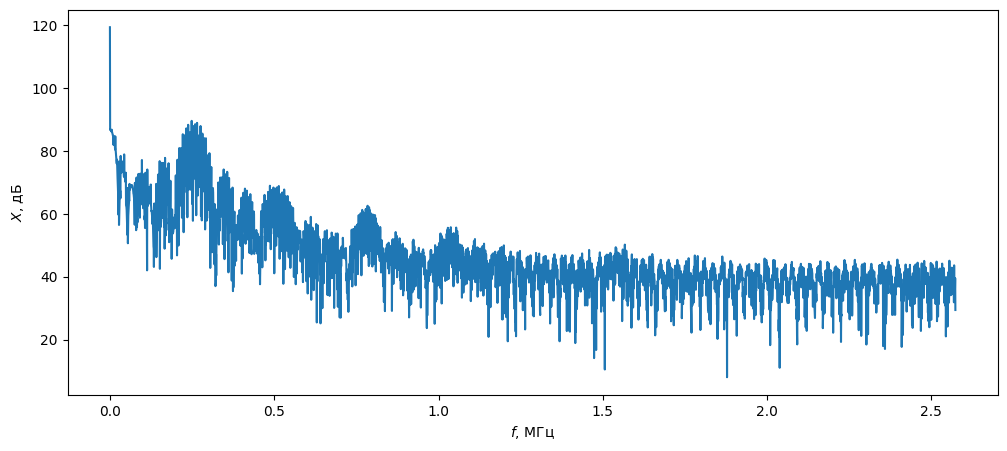

In [41]:
with open("Lab4_data/1_1.txt", "r") as f:
    markers = [0.19, 0.25, 0.32]
    plot_osc_spec("2_2", f.readlines(), 2000, 8192, 4096, markers, crop_markers_left=0, crop_markers_right=0.7)

2_2


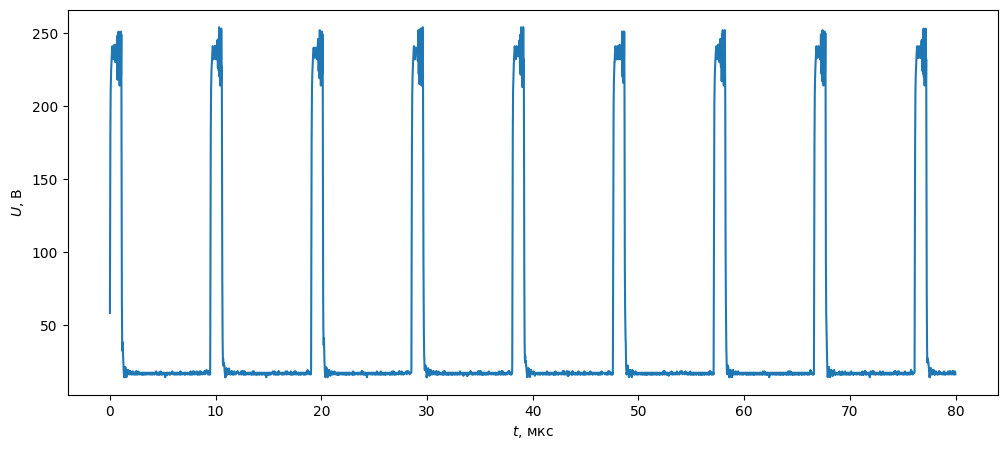

FFT with markers, 2_2
0.5 1.1
marker: 0.525, value: 11.836453197667343 - 57.83872856379794 дБ
0.5 1.1
marker: 0.54, value: 42.65163243887989 - 62.91975223747998 дБ
0.5 1.1
marker: 0.56, value: 27.735837615794715 - 58.49617497128163 дБ
0.5 1.1
marker: 0.585, value: 39.82562719051824 - 62.80353957199889 дБ
0.5 1.1
marker: 0.61, value: 34.538146046569786 - 57.02243170107626 дБ
0.5 1.1
marker: 0.635, value: 42.65954422545814 - 61.15976952204855 дБ
0.5 1.1
marker: 0.66, value: 28.61875113555234 - 57.64998664219091 дБ
0.5 1.1
marker: 0.76, value: 45.63896786434882 - 64.12857830194108 дБ
0.5 1.1
marker: 0.9, value: 27.063418088241548 - 51.40331561892217 дБ
0.5 1.1
marker: 0.92, value: 30.121580231779255 - 53.528338944657385 дБ
0.5 1.1
marker: 0.935, value: 26.45245560430549 - 47.79066036235372 дБ
0.5 1.1
marker: 0.96, value: 29.175552194649413 - 52.220376167157255 дБ
0.5 1.1
marker: 0.985, value: 29.711984603190935 - 46.380981623954305 дБ
0.5 1.1
marker: 1.01, value: 34.03173255143071 - 52.04

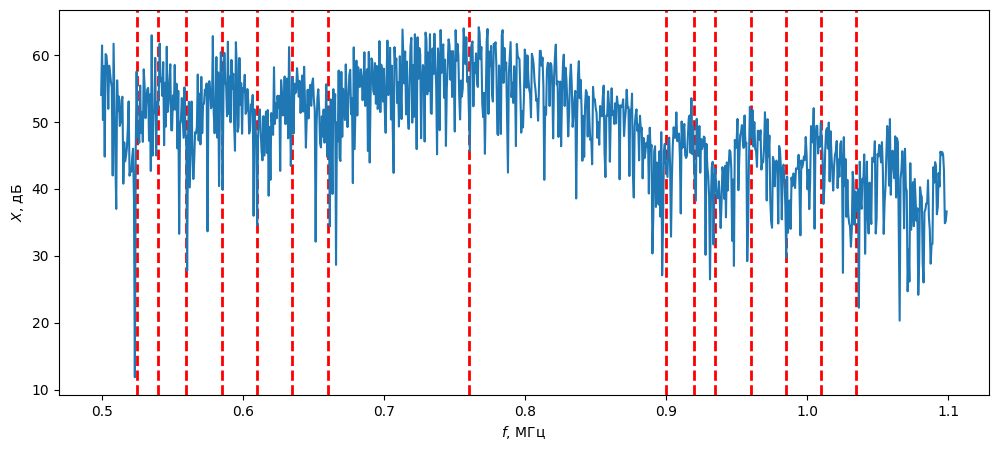

FFT, 2_2


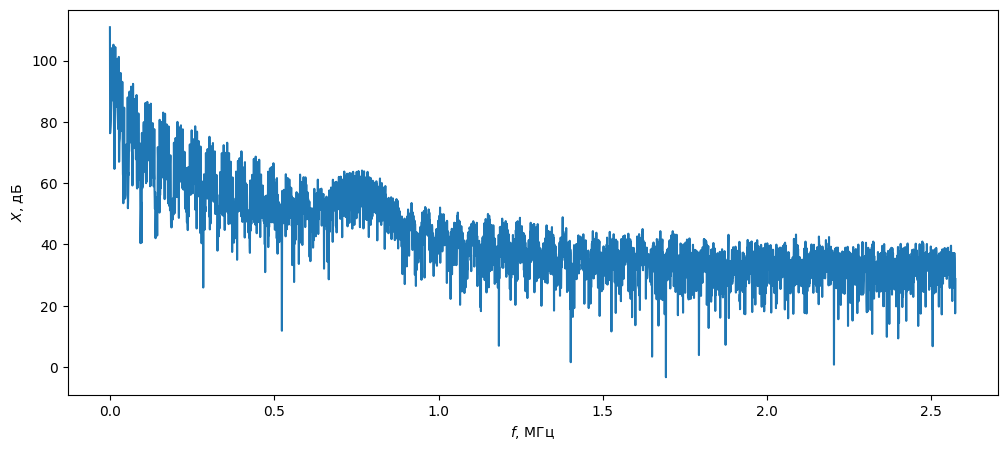

In [40]:
with open("Lab4_data/2_2.txt", "r") as f:
    markers = [0.525, 0.54, 0.56, 0.585, 0.61, 0.635, 0.66, 0.76, 0.90, 0.92, 0.935, 0.96, 0.985, 1.01, 1.035]
    plot_osc_spec("2_2", f.readlines(), -1, 8192, 4096, markers, crop_markers_left=0.5, crop_markers_right=1.1)